In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from PIL import Image
import torchvision.transforms as transforms
import numpy as np

In [11]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [12]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=512, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=512, shuffle=False)


In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()


In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [15]:
for epoch in range(3):  # 3 epochs
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 0.3609
Epoch 2, Loss: 0.2715
Epoch 3, Loss: 0.1432


In [16]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [17]:
print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 93.91%


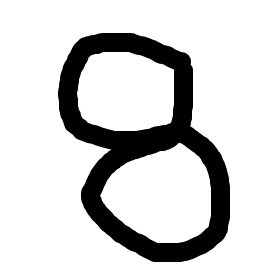

In [19]:
img = Image.open(r"C:\Users\Karthic\OneDrive\Desktop\test.png").convert("L")  # 'L' = grayscale
img

In [20]:
img = img.resize((28, 28))
img

In [21]:
img = Image.fromarray(255 - np.array(img))
img

In [22]:
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor (C, H, W) in [0,1]
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST normalization
])

img_tensor = transform(img).unsqueeze(0)  # add batch dimension


In [23]:
model.eval()
with torch.no_grad():
    output = model(img_tensor)  # if GPU available
    pred = output.argmax(dim=1, keepdim=True)
    print("Predicted Digit:", pred.item())


Predicted Digit: 8
